#                           Used Car Price Prediction

### DATASET INFORMATION :-


Used Car Price Prediction Dataset is a comprehensive collection of automotive information extracted from the popular automotive marketplace website, https://www.cars.com. This dataset comprises 4,009 data points, each representing a unique vehicle listing, and includes nine distinct features providing valuable insights into the world of automobiles.

###   This dataset is available on:

https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset/data

#### PROBLEM IDENTIFICATION :-

a) Design a predictive model with the use of machine learning algorithms to predict price of used car.

b) Design a predictive model with the use of machine learning algorithms to predict what factor is most populer to buy a used car.

#### TARGET VARIABLE :-

-  prices

#### LABELS / ATTRIBUTE INFORMATION :-

-  Brand & Model: Identify the brand or company name along with the specific model of each vehicle.

-  Model Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.

-  Mileage: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.

-  Fuel Type: Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.

-  Engine Type: Understand the engine specifications, shedding light on performance and efficiency.

-  Transmission: Determine the transmission type, whether automatic, manual, or another variant.

-  Exterior & Interior Colors: Explore the aesthetic aspects of the vehicles, including exterior and interior color options.

-  Accident History: Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.

-  Clean Title: Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.

-  Price: Access the listed prices for each vehicle, aiding in price comparison and budgeting.

#### TOOLS USED 

The following tools are going to be used for data analysis-

-  Pandas
-  Numpy
-  Matplotlib
-  Seaborn
-  scipy.stats
-  Scikit-learn

#### IMPORTING NECESSARY LIBRARIES

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

import warnings 
warnings.filterwarnings('ignore')

#### LOAD THE DATASET 

In [2]:
import pandas as pd

car_price= pd.read_pickle(r'Pre-processcar_cap.pkl')
car_price.head()

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,prices,Mileage
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300,51000
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005,34742
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598,22372
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500,88900
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999,9835


we have most of the data objective type except mileages, model_year and our target price.

#### DATA EXPLORATION 

In [3]:
# Checking the shape of the dataset-

print("Number of rows in the given dataset:",car_price.shape[0])

print("Number of columns in the given dataset:",car_price.shape[1])

Number of rows in the given dataset: 4009
Number of columns in the given dataset: 12


In [4]:
# checking the names of all the columns 

car_price.columns

Index(['brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission',
       'ext_col', 'int_col', 'accident', 'clean_title', 'prices', 'Mileage'],
      dtype='object')

 These are the list of the 12 columns names present in the dataset.

In [5]:
# checking the datatypes of all the columns 

car_price.dtypes

brand           object
model           object
model_year       int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
prices           int64
Mileage          int64
dtype: object

In [6]:
# Checking the information present in dataset

car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   fuel_type     3839 non-null   object
 4   engine        4009 non-null   object
 5   transmission  4009 non-null   object
 6   ext_col       4009 non-null   object
 7   int_col       4009 non-null   object
 8   accident      3896 non-null   object
 9   clean_title   3413 non-null   object
 10  prices        4009 non-null   int64 
 11  Mileage       4009 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 376.0+ KB


-  fuel_type,accident and clean_title have null values other than this there is no null value present

#### CHECKING MISSING VALUES IN OUR DATASET

brand             0
model             0
model_year        0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
prices            0
Mileage           0
dtype: int64


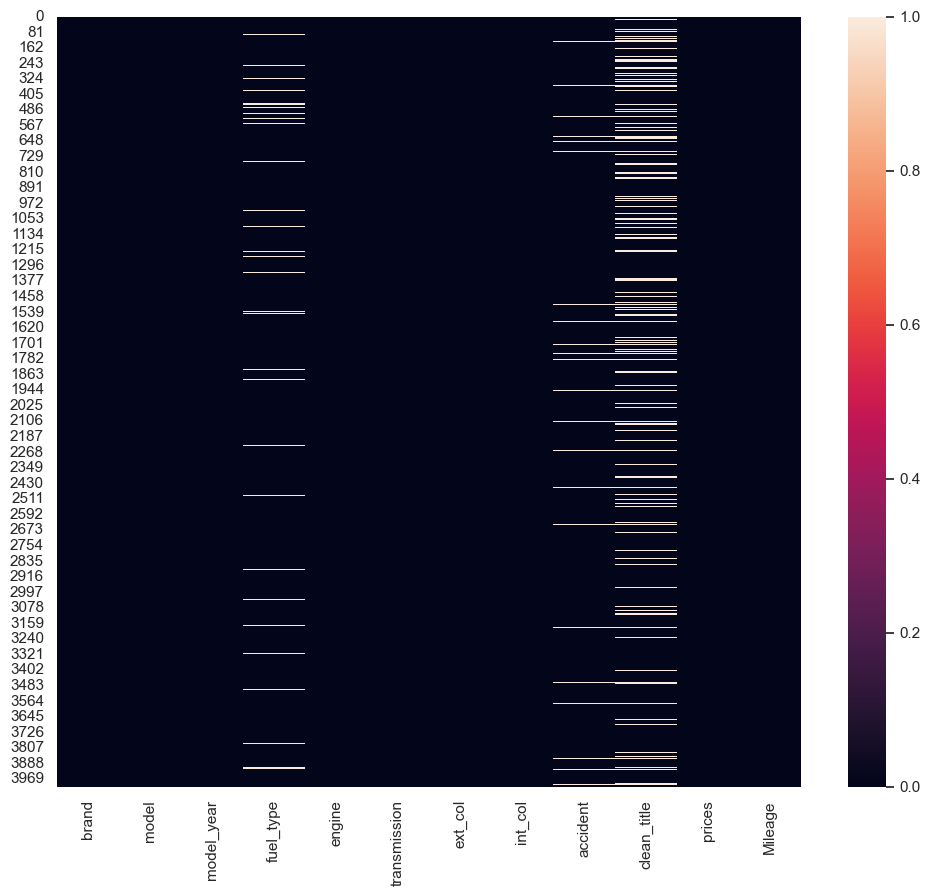

In [7]:
plt.figure(figsize=[12,10])
sns.heatmap(car_price.isnull())
print(car_price.isnull().sum())

In [8]:
#Drop the rows with null values in clean_title and accident column
car_price.dropna(subset = ['clean_title', 'accident', 'fuel_type'], axis = 0, inplace = True)

In [9]:
#drop clean_title column , accident column 
car_price.drop(['clean_title', 'accident','fuel_type'], axis = 1, inplace = True)

In [10]:
car_price.shape

(3269, 9)

In [11]:
car_price.head(1)

,brand,model,model_year,engine,transmission,ext_col,int_col,prices,Mileage
0,Ford,Utility Police Interceptor Base,2013,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,10300,51000


In [12]:
for i in car_price.columns:
    if car_price[i].dtypes == 'object':
        car_price[i].fillna(car_price[i].mode()[0],inplace = True)    #imputing mode value for missing values in categorical variables.
    elif car_price[i].dtypes == 'int':
        car_price[i].fillna(np.mean(car_price[i]),inplace = True)    #imputing mean value for missing values in numerical variables.
      

In [13]:
car_price.isnull().sum()

brand           0
model           0
model_year      0
engine          0
transmission    0
ext_col         0
int_col         0
prices          0
Mileage         0
dtype: int64

we have manage our missing values with mode and mean and we don't have any nulll value present in our dataset.

In [14]:
car_price.describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,3269.0,2014.601407,6.152181,1974.0,2011.0,2016.0,2019.0,2024.0
prices,3269.0,41241.126338,83046.041220,2000.0,15500.0,28000.0,46500.0,2954083.0
Mileage,3269.0,72126.951973,53387.413623,100.0,30450.0,62930.0,102750.0,405000.0


-  we have three numeric data and count is 4009 that means data have no null values present.
-  max price is 2954083.0 and min is 2000
-  The mean and median value have some variations that mean our data is right skewed.
-  mean and max also have some variable that means it has some outliers present. 

#### ENCODING CATEGORICAL DATA

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 

In [16]:
# loop over all the columns where dtypes is object then print the columns name and there unique values -

for col in car_price.select_dtypes(include=['object']).columns:
    print(f"{col}:{car_price[col].unique()}")

brand:['Ford' 'Hyundai' 'INFINITI' 'Audi' 'BMW' 'Lexus' 'Aston' 'Toyota'
 'Lincoln' 'Land' 'Mercedes-Benz' 'Dodge' 'Nissan' 'Jaguar' 'Chevrolet'
 'Kia' 'Jeep' 'Bentley' 'MINI' 'Porsche' 'Hummer' 'Chrysler' 'Acura'
 'Volvo' 'Cadillac' 'Maserati' 'Genesis' 'Volkswagen' 'GMC' 'RAM' 'Subaru'
 'Alfa' 'Ferrari' 'Scion' 'Mitsubishi' 'Mazda' 'Saturn' 'Honda' 'Bugatti'
 'Lamborghini' 'Rolls-Royce' 'McLaren' 'Buick' 'Lotus' 'Pontiac' 'FIAT'
 'Saab' 'Mercury' 'Plymouth' 'smart' 'Maybach' 'Suzuki']
model:['Utility Police Interceptor Base' 'Palisade SEL' 'Q50 Hybrid Sport' ...
 'CT 200h Base' 'Impala 2LZ' 'Continental GT Speed']
engine:['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability'
 '3.8L V6 24V GDI DOHC'
 '354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid'
 '292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel'
 '282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel'
 '311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel'
 '715.0HP 5.2L 12 Cylinder Engine Gasoline Fuel'
 '382.0HP 3.0L Straight 6 Cylinder Engin

In [17]:
for i in car_price.columns:
    if car_price[i].dtypes == "object":
        car_price[i] = le.fit_transform(car_price[i].values.reshape(-1,1))
car_price.head() 

,brand,model,model_year,engine,transmission,ext_col,int_col,prices,Mileage
0,14,1481,2013,492,7,8,1,10300,51000
1,19,1011,2021,478,20,69,32,38005,34742
3,20,1055,2015,630,13,8,1,15500,88900
6,3,1235,2017,442,7,14,1,31000,84000
7,4,119,2001,415,24,47,33,7300,242000


-  we have encoded the categorical data by using label encoder and turn all the columns into numeric data.

#### CORRELATION MATRIX

<AxesSubplot:>

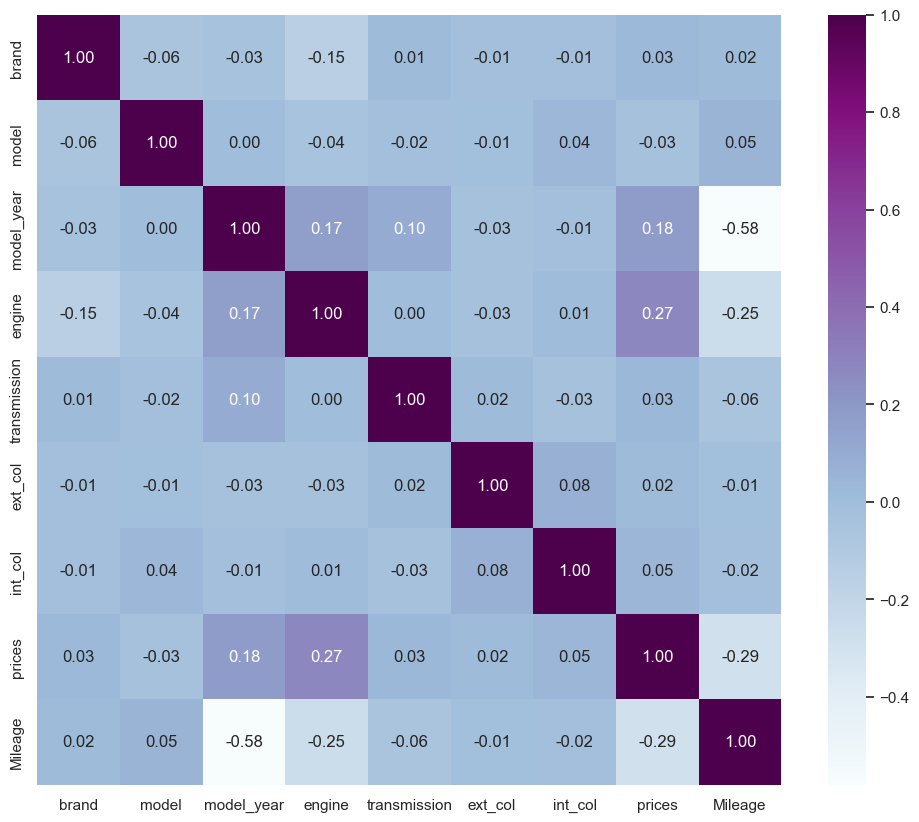

In [18]:
#Plotting the correlation of columns
Correlation=car_price.corr()

plt.figure(figsize=[12,10])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='BuPu')

engine          0.274638
model_year      0.183538
int_col         0.047320
transmission    0.034093
brand           0.028790
ext_col         0.017990
model          -0.028206
Mileage        -0.285901
Name: prices, dtype: float64


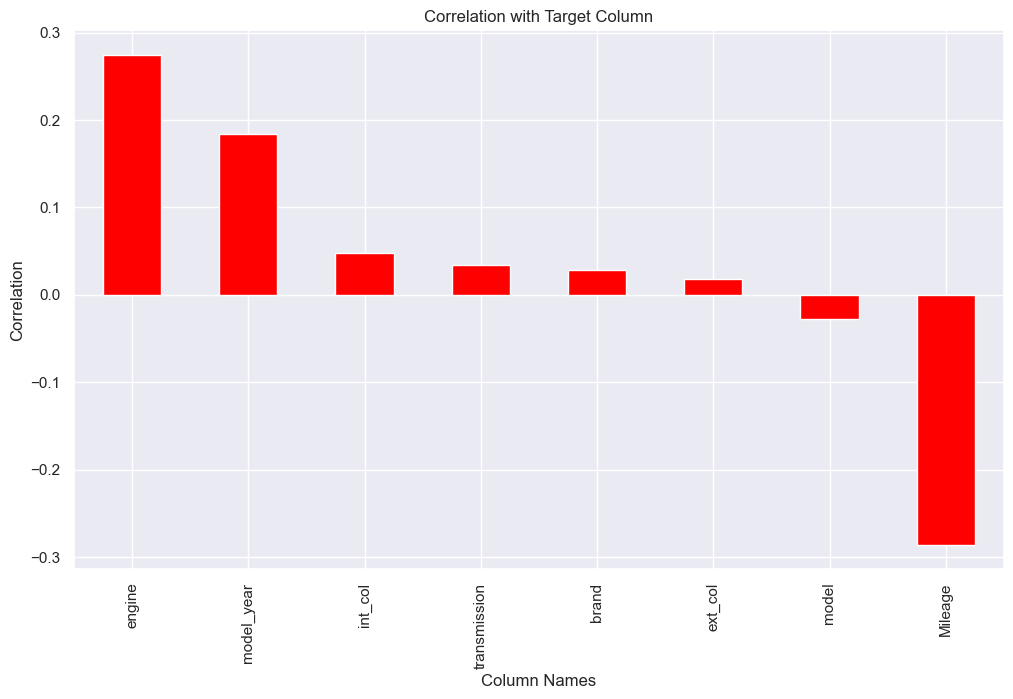

In [19]:
print(Correlation['prices'].drop('prices').sort_values(ascending = False))
plt.figure(figsize = [12,7])
Correlation['prices'].sort_values(ascending= False).drop('prices').plot(kind = 'bar', color ='red')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

-  Car engine has the highest positive correlation among any other feature.On the other hand milages has highest negative correlation.
-  Mileage, engine, price are highly corrleated to each other.

#### CHECKING SKEWNESS

In [20]:
skewness=car_price.skew()
skewness.sort_values(ascending=True)

model_year      -0.947307
transmission    -0.434564
engine          -0.161163
model            0.103168
ext_col          0.117986
brand            0.357837
Mileage          1.026133
int_col          1.576646
prices          20.245614
dtype: float64

-  Data is skewed, model_year, mileage, are skewed.
- Although, fuel_type,int_col,transmission are categorical in nature. So the skewness of these columns are irrelevant.

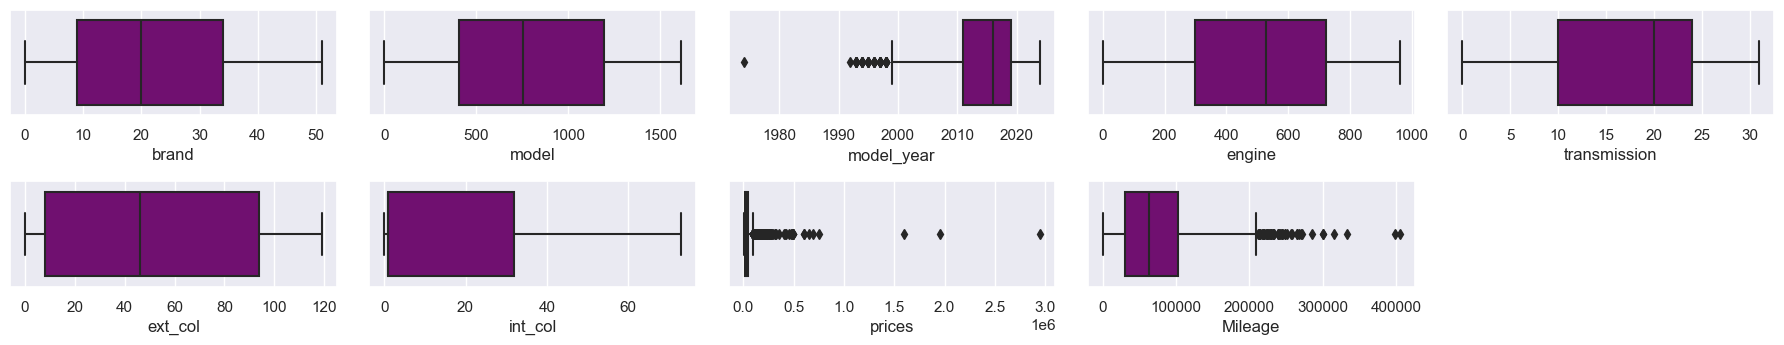

In [21]:
plt.figure(figsize=(18,10))
plot=1
for col in car_price.columns:
    if plot<= 25:
        plt.subplot(6,5,plot)
        sns.boxplot(car_price[col],color='purple')
        plt.xlabel(col)
        plot=plot+1
plt.tight_layout()

-   model year, mileages, price have some outliers. We will remove them so that our data will fit properly when doing modeling .


In [22]:
for i in ['model_year','Mileage','prices',]:
#finding quartile values    
  Q1=np.percentile(car_price[i],25,interpolation='midpoint')
  Q2=np.percentile(car_price[i],50,interpolation='midpoint')
  Q3=np.percentile(car_price[i],75,interpolation='midpoint')
#finding the IQR    
  IQR=Q3-Q1    
#finding upper and low limits    
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
#finding outliers
  car_price.loc[car_price[i]<lower_limit, i] = lower_limit
  car_price.loc[car_price[i]>upper_limit, i] = upper_limit

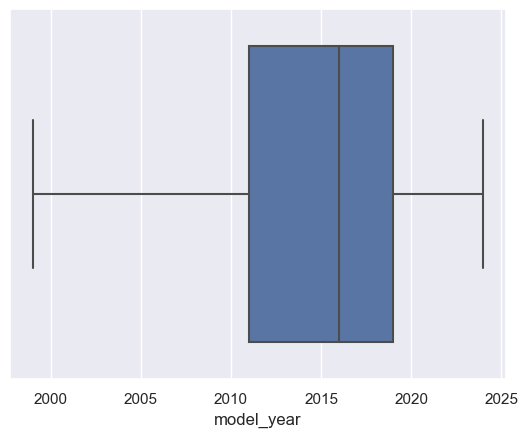

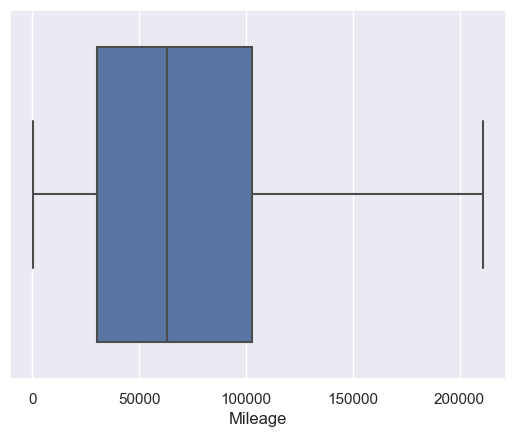

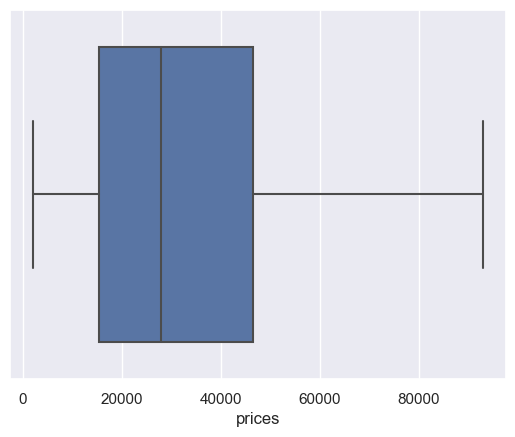

In [23]:
# compare the boxplot after removing outliers
for i in ['model_year', 'Mileage','prices',]:
    sns.boxplot(x=car_price[i])
    plt.show()

-  We removed all the outliers  using IQR method and now our data is statistically significant and help us to make good correlations.

#### Train/Test Split

In [24]:
#Splitting the data into 'x' and 'y' labels-
X = car_price.drop('prices', axis=1)
y = car_price['prices']

print(X.shape)
print(y.shape)


(3269, 8)
(3269,)


In [25]:
car_price.head()

,brand,model,model_year,engine,transmission,ext_col,int_col,prices,Mileage
0,14,1481,2013,492,7,8,1,10300,51000
1,19,1011,2021,478,20,69,32,38005,34742
3,20,1055,2015,630,13,8,1,15500,88900
6,3,1235,2017,442,7,14,1,31000,84000
7,4,119,2001,415,24,47,33,7300,211200


In [26]:
from sklearn.model_selection import train_test_split

#split the Dataset into train and test
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.25)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(2451, 8) (818, 8)
(2451,) (818,)


-  Out of 3269 raws and 8 columns, we split our data into training and testing. We have  818 rows and 8 columns for testing and 2451 raws and 8 columns data for training. 

In [27]:
# Checking the percentage of data loss 

data_loss = (car_price.shape[0]-car_price.shape[0])/car_price.shape[0]*100
data_loss

0.0

### APPLYING STANDARD SCALING BEFORE REMOVING SKEWNESS

In [28]:
x = X.copy()
y = y.copy()
z = x.columns
print(x.shape)
print(y.shape)

(3269, 8)
(3269,)


In [29]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(X)
x = pd.DataFrame(X,columns = z)
x

,brand,model,model_year,engine,transmission,ext_col,int_col,Mileage
0,14,1481,2013,492,7,8,1,51000
1,19,1011,2021,478,20,69,32,34742
3,20,1055,2015,630,13,8,1,88900
6,3,1235,2017,442,7,14,1,84000
7,4,119,2001,415,24,47,33,211200
...,...,...,...,...,...,...,...,...
4003,34,490,2018,292,24,8,1,53705
4004,5,431,2023,911,21,20,34,714
4005,3,1239,2022,620,30,8,1,10900
4007,14,594,2020,795,24,14,1,33000


-  We scale our data by using standard scaler so that our data can be distributed properly and  help to improve model performance, reduce the impact of outliers, and ensure that the data is on the same scale.

In [30]:
#We can set the skewness standard limit as +/-0.5.

x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.5]

int_col       1.576646
Mileage       0.739476
model_year   -0.747182
dtype: float64

-  These are the features where skewness is present

In [31]:
from sklearn.preprocessing import power_transform

def skew(col):
    x[col]=power_transform((x[col].values.reshape(-1,1)))
    
skew('int_col')
skew('Mileage')
skew('model_year')


In [32]:
x.skew().sort_values(ascending = False)

int_col         0.375690
brand           0.357837
ext_col         0.117986
model           0.103168
Mileage        -0.135962
engine         -0.161163
transmission   -0.434564
model_year     -0.497507
dtype: float64

-  Skewness from all the columns have been removed.

### REMOVING OUTLIERS ( using z score method)

In [33]:
from scipy.stats import zscore

In [34]:
# Removing outliers using zscore and keeping threshold as 3 .

z_score = np.abs(zscore(x))

filter_dt = (z_score < 3).all(axis = 1)
car_price1 = x[filter_dt]
car_price1['Price'] = y.copy()
car_price1.head() 

,brand,model,model_year,engine,transmission,ext_col,int_col,Mileage,Price
0,14,1481,-0.352959,492,7,8,-0.440252,-0.192980,10300
1,19,1011,1.121905,478,20,69,1.354712,-0.578832,38005
3,20,1055,-0.009006,630,13,8,-0.440252,0.505511,15500
6,3,1235,0.350964,442,7,14,-0.440252,0.425552,31000
7,4,119,-2.117372,415,24,47,1.363674,2.033554,7300


In [35]:
car_price1.shape

(3269, 9)

### Checking the Multicolinearity

In [36]:
x = car_price1.drop('Price',axis = 1)
y = car_price1['Price']
print(x.shape)
print(y.shape)

(3269, 8)
(3269,)


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif.sort_values(by ='VIF Factor', ascending = False))

In [38]:
vif(x)

,Column Name,VIF Factor
4,transmission,3.923607
3,engine,3.688074
1,model,3.107176
0,brand,2.655548
5,ext_col,2.484991
7,Mileage,1.739433
2,model_year,1.694580
6,int_col,1.008792


-  We have all data below 5 that means VIF value below 5 indicates that multicollinearity is not a significant concern. This suggests that the variance of a regression coefficient is not inflated due to collinearity with other predictors in the model.

### MODEL Building 

In [39]:
# SPLITTING THE DATA INTO X AND Y VARIABLE.

input= X.copy()
output = y.copy()

- We divide the data into x and y variable.

#### Important Liberaries

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

# for cross validation
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.linear_model import Lasso,Ridge,ElasticNet  #Reguralization technique

from sklearn.model_selection import train_test_split

##### FINDING BEST RANDOM STATE

In [41]:
 
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(input,output,test_size =0.20, random_state =i )
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.876926826467884 on random_state: 57


- Random state help us split train test data every time we run the code.We will use 57 for our random state. 

In [42]:
#Applying the best selected random state -

x_train,x_test,y_train,y_test = train_test_split(input,output,test_size =0.20, random_state =57 )

### TESTING ALL MODELS ONE BY ONE

#### 1) LINEAR REGRESSION 

In [43]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
acc = r2_score(y_test,pred_test)
mse = mean_squared_error(y_test,pred_test)
mae = mean_absolute_error(y_test,pred_test)
print("R2 score is ", acc)
print("_"*50)
print("Mean Sqaured Error is ",mse)
print("_"*50)
print("Mean Absolute Error is ",mae)
print("_"*50)
print("Coefficent is ",lr.coef_)
print("_"*50)
print("Intercept is ",lr.intercept_)
print("_"*50)

R2 score is  0.6986196598119463
__________________________________________________
Mean Sqaured Error is  171879290.4399597
__________________________________________________
Mean Absolute Error is  10209.643992479667
__________________________________________________
Coefficent is  [ 1.40992988e+02  2.12789990e-01  1.01379259e+03  4.21723464e+01
 -9.21876147e-01  7.52418821e-01  5.45707137e+01 -1.86696506e-01]
__________________________________________________
Intercept is  -2020318.052647727
__________________________________________________


In [44]:
#cross validation of LINEAR REGRESSION 

cross_val_score(lr,input,output,cv=5).mean()

0.6602003115721751

#### 2) SVR

In [45]:
svr = SVR()
svr.fit(x_train,y_train)
pred_testsvr = svr.predict(x_test)
acc = r2_score(y_test,pred_testsvr)
mse = mean_squared_error(y_test,pred_testsvr)
mae = mean_absolute_error(y_test,pred_testsvr)
print("R2 score is ", acc)
print("_"*50)
print("Mean Sqaured Error is ",mse)
print("_"*50)
print("Mean Absolute Error is ",mae)
print("_"*50)

R2 score is  -0.06278575417397758
__________________________________________________
Mean Sqaured Error is  606114059.0761119
__________________________________________________
Mean Absolute Error is  18235.868107935163
__________________________________________________


In [46]:
# cross validation of SVR

cross_val_score(svr,input,output,cv=5).mean()

-0.048179903780307856

#### 3) RANDOM FOREST REGRESSOR

In [47]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train,y_train)
pred_testrf = rfr.predict(x_test)
acc = r2_score(y_test,pred_testrf)
mse = mean_squared_error(y_test,pred_testrf)
mae = mean_absolute_error(y_test,pred_testrf)
print("R2 score is ", acc)
print("_"*50)
print("Mean Sqaured Error is ",mse)
print("_"*50)
print("Mean Absolute Error is ",mae)
print("_"*50)

R2 score is  0.8768865749434189
__________________________________________________
Mean Sqaured Error is  70212436.97964709
__________________________________________________
Mean Absolute Error is  6071.635596330275
__________________________________________________


In [48]:
# Cross validation RANDOM FOREST REGRESSOR

cross_val_score(rfr,input,output,cv=5).mean()

0.8336153275743525

#### 4) KNN REGRESSOR

In [49]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_test = knn.predict(x_test)
acc = r2_score(y_test,pred_test)
mse = mean_squared_error(y_test,pred_test)
mae = mean_absolute_error(y_test,pred_test)
print("R2 score is ", acc)
print("_"*50)
print("Mean Sqaured Error is ",mse)
print("_"*50)
print("Mean Absolute Error is ",mae)
print("_"*50)

R2 score is  0.5976171994745959
__________________________________________________
Mean Sqaured Error is  229481691.46134555
__________________________________________________
Mean Absolute Error is  11395.378287461774
__________________________________________________


In [50]:
#Cross validation of KNN Regressor

cross_val_score(knn,input,output,cv=5).mean()

0.5775521507422898

#### 5) GRADIENT BOOSTING REGRESSOR

In [51]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_testgb = gbr.predict(x_test)
acc = r2_score(y_test,pred_testgb)
mse = mean_squared_error(y_test,pred_testgb)
mae = mean_absolute_error(y_test,pred_testgb)
print("R2 score is ", acc)
print("_"*50)
print("Mean Sqaured Error is ",mse)
print("_"*50)
print("Mean Absolute Error is ",mae)
print("_"*50)

R2 score is  0.8769855556402677
__________________________________________________
Mean Sqaured Error is  70155987.60431285
__________________________________________________
Mean Absolute Error is  6139.136665138715
__________________________________________________


In [52]:
# Cross validation gradient boosting Regressor
cross_val_score(gbr,input,output,cv=5).mean()

0.8359674933399509

#### 6) DecisionTreeRegressor

In [53]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_testdt = dtr.predict(x_test)
acc = r2_score(y_test,pred_testdt)
mse = mean_squared_error(y_test,pred_testdt)
mae = mean_absolute_error(y_test,pred_testdt)
print("R2 score is ", acc)
print("_"*50)
print("Mean Sqaured Error is ",mse)
print("_"*50)
print("Mean Absolute Error is ",mae)
print("_"*50)

R2 score is  0.7022789010449347
__________________________________________________
Mean Sqaured Error is  169792399.88073394
__________________________________________________
Mean Absolute Error is  8622.8501529052
__________________________________________________


In [54]:
# Cross validation of DecisionTreeRegressor
cross_val_score(dtr,input,output,cv=5).mean()

0.6784857129746432

#### 7) ADA BOOST REGRESSOR

In [55]:
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
pred_testad = abr.predict(x_test)
acc = r2_score(y_test,pred_testad)
mse = mean_squared_error(y_test,pred_testad)
mae = mean_absolute_error(y_test,pred_testad)
print("R2 score is ", acc)
print("_"*50)
print("Mean Sqaured Error is ",mse)
print("_"*50)
print("Mean Absolute Error is ",mae)
print("_"*50)

R2 score is  0.687185560905925
__________________________________________________
Mean Sqaured Error is  178400236.051611
__________________________________________________
Mean Absolute Error is  10963.759772374224
__________________________________________________


In [56]:
# Cross validation of ada boost regressor
cross_val_score(abr,input,output,cv=5).mean()

0.6509936734535832

#### 8) EXTRA TREE REGRESSOR

In [57]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_testet = etr.predict(x_test)
acc = r2_score(y_test,pred_testet)
mse = mean_squared_error(y_test,pred_testet)
mae = mean_absolute_error(y_test,pred_testet)
print("R2 score is ", acc)
print("_"*50)
print("Mean Sqaured Error is ",mse)
print("_"*50)
print("Mean Absolute Error is ",mae)
print("_"*50)


R2 score is  0.8717832493494291
__________________________________________________
Mean Sqaured Error is  73122898.82806009
__________________________________________________
Mean Absolute Error is  6187.825091743119
__________________________________________________


In [58]:
#Cross validation of EXTRA TREE REGRESSOR

cross_val_score(etr,input,output,cv=5).mean()

0.8305459041314688

#### 9) XGB REGRESSOR

In [59]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
pred_testxg = xgb.predict(x_test)
acc = r2_score(y_test,pred_testxg)
mse = mean_squared_error(y_test,pred_testxg)
mae = mean_absolute_error(y_test,pred_testxg)
print("R2 score is ", acc)
print("_"*50)
print("Mean Sqaured Error is ",mse)
print("_"*50)
print("Mean Absolute Error is ",mae)
print("_"*50)

R2 score is  0.9077804050431155
__________________________________________________
Mean Sqaured Error is  52593472.2084373
__________________________________________________
Mean Absolute Error is  5322.019439790592
__________________________________________________


In [60]:
#Cross validation of XGB REGRESSOR
cross_val_score(xgb,input,output,cv=5).mean()

0.8615877290481851

- After testing and cross validating the models, the XGB Regressor model is performing well and providing an accuracy score of 90.7% with a cross validation mean score of 86.1% for 5 fold cross validations

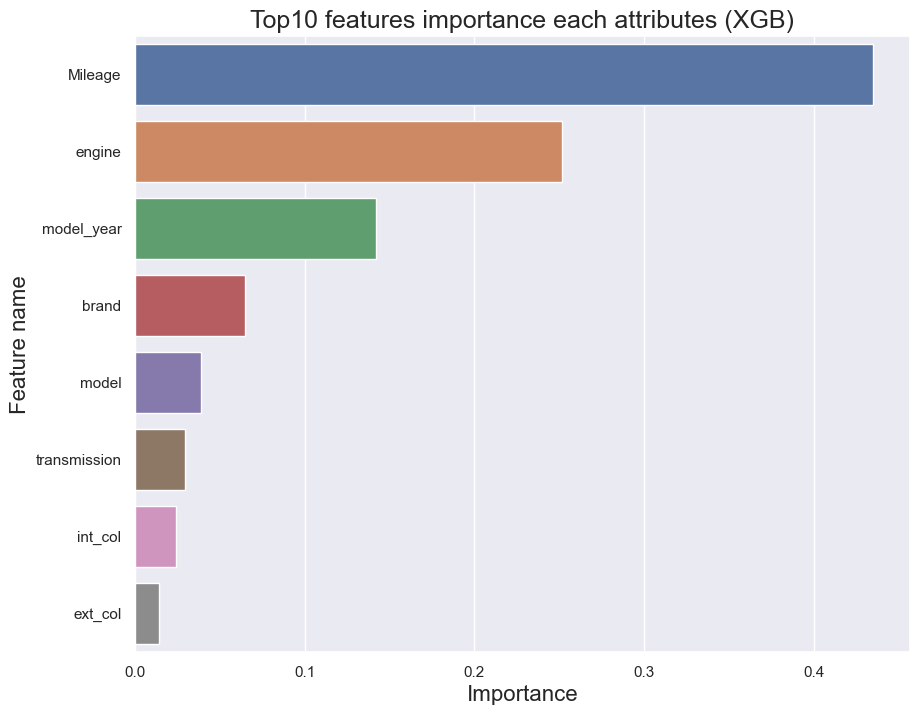

In [61]:
imp_id=pd.DataFrame({"Feature Name":x_train.columns,"Importance":xgb.feature_importances_})
fi=imp_id.sort_values(by="Importance",ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x="Importance",y="Feature Name")
plt.title('Top10 features importance each attributes (XGB)',fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature name', fontsize=16)
plt.show()

-  Using Xgb we have top features which help us to predict the price, In this, milage is the top most and exterior color is the least to predict price.

#### HYPERPARAMETER TUNNING OF EXTRA XGB REGRESSOR

In [62]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [63]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
parameters = {'n_estimators':[100,125,150,200],
             'criterion': ['squared_error','absolute_error'],
             'max_features': [None,'sqrt','log2'],
             'max_depth':[10,20,30,None]}

grid = HalvingGridSearchCV(estimator = XGBRegressor(),param_grid=parameters, cv = 5)
grid.fit(input,output)

HalvingGridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                  

In [64]:
grid.best_score_

0.8654386958647893

In [65]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 150}

In [66]:
xgb = XGBRegressor(n_estimators=150,max_depth=20,max_features='sqrt',criterion='absolute_error')
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size =0.20)
xgb.fit(x_train, y_train)
pred_test_xgb = xgb.predict(x_test)


print('R2 Score',r2_score(y_test,pred_test_xgb))
print('Mean Squared Error',mean_squared_error(y_test,pred_testxg))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_testxg))

R2 Score 0.8434004587190871
Mean Squared Error 1190732282.1669931
Mean Absolute Error 26532.747459668266


In [67]:
cv_score = cross_val_score(xgb,x,y, cv = 5)
cv_mean =cv_score.mean()
print("At cv fold",5," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(y_test,pred_testxg))

At cv fold 5  the cv score is  0.814278158762531 and the R2 score  is  -1.1189381102628064


- After all the tests, cross validations and tunings, the XGB regressor () is performing well with the accuracy score is 86.5% with a cross validation mean score of 81% for 5 cross validations.

#### Saving the Best Model

In [68]:
import pickle

filename = 'Car_price_pred_model .pkl'
pickle.dump(xgb,open(filename,'wb'))

#### CONCLUSION 

In [69]:
original = np.array(y_test)
predicted = np.array(xgb.predict(x_test))

pred_price = pd.DataFrame({'Original price($)':original,'Predicted price($)':predicted})
pred_price.sample(20)

,Original price($),Predicted price($)
410,9950,11538.112305
574,10300,18324.794922
261,4200,10243.758789
46,49000,47537.359375
653,93000,93063.320312
532,27900,47768.007812
515,13000,13580.273438
215,72999,63997.128906
409,93000,93778.007812
561,6500,13366.027344


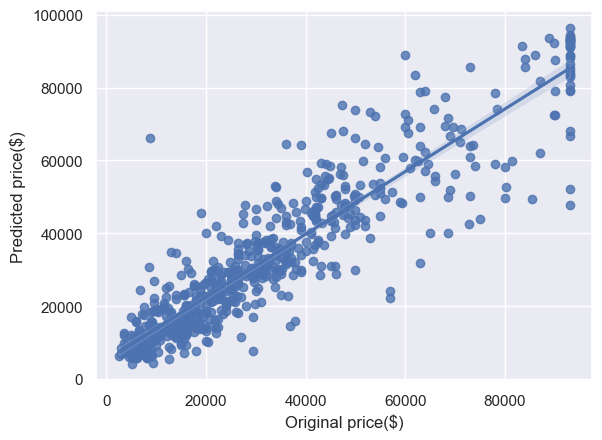

In [70]:
sns.regplot('Original price($)', 'Predicted price($)', data = pred_price)
plt.show()

- We have obeserved and predicted value near to diagonal line that means it have low variance and data fit properly by using XG BOOST. 